# Libraries

In [ ]:
%pip install llama-index-vector-stores-lancedb
%pip install llama-index-multi-modal-llms-openai
%pip install llama-index-embeddings-clip
%pip install git+https://github.com/openai/CLIP.git
%pip install llama_index
%pip install -U openai-whisper
%pip install lancedb
%pip install moviepy
%pip install pytube
%pip install pydub
%pip install SpeechRecognition
%pip install ffmpeg-python
%pip install soundfile
%pip install torch torchvision
%pip install matplotlib scikit-image
%pip install ftfy regex tqdm
%pip install -U yt-dlp
%pip install groq
%pip install llama-index-multi-modal-llms-gemini
!pip install llama-index-readers-file


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Cloning https://github.com/openai/CLIP.git to c:\users\kartikeya\appdata\local\temp\pip-req-build-2713jyka
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git 'C:\Users\Kartikeya\AppData\Local\Temp\pip-req-build-2713jyka'

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from moviepy import VideoFileClip
from pathlib import Path
import speech_recognition as sr
from pytube import YouTube
from pprint import pprint
from PIL  import Image
import matplotlib.pyplot as plt

In [28]:
import os
from dotenv import load_dotenv

load_dotenv()

GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY","your-google-api-key")
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY","your-openai-api-key")


In [15]:
video_url = "https://www.youtube.com/watch?v=3dhcmeOTZ_Q"
output_video_path = ".\\content\\video_data\\"
output_folder = ".\\content\\mixed_data\\"
output_audio_path = ".\\content\\mixed_data\\output_audio\\extracted_audio.mp3"


In [16]:
filepath = output_video_path + "input_video.mp4"
filepath


'.\\content\\video_data\\input_video.mp4'

In [17]:
import yt_dlp

def download_video(url, output_path):
    ydl_opts = {
        "outtmpl": f"{output_path}/input_video.%(ext)s",
        "format": "bestvideo+bestaudio/best",
        "merge_output_format": "mp4",
        "quiet": True,
    }

    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        info = ydl.extract_info(url, download=True)

    metadata = {
        "Author": info.get("uploader"),
        "Title": info.get("title"),
        "Views": info.get("view_count"),
        "Duration": info.get("duration"),
        "Resolution": info.get("resolution"),
    }

    return metadata

In [18]:
def video_to_image(video_path , output_folder):
    clip = VideoFileClip(video_path)
    clip.write_images_sequence(
        os.path.join(output_folder,"frame%04d.png"),fps=0.2
    )

In [19]:
def video_to_audio(video_path , output_audio_path):
    clip = VideoFileClip(video_path)
    audio = clip.audio
    audio.write_audiofile(output_audio_path)
    clip.close()

In [25]:
import os
from groq import Groq

def audio_to_text(audio_path):
    client = Groq()

    try:
        with open(audio_path, "rb") as file:
            transcription = client.audio.transcriptions.create(
                file=(os.path.basename(audio_path), file.read()),
                model="whisper-large-v3",  
                response_format="json",    
                language="en"              
            )
            
            return transcription.text

    except FileNotFoundError:
        print(f"Error: The file '{audio_path}' was not found.")
    except Exception as e:
        print(f"An error occurred during transcription: {e}")

    return None

In [21]:
metadata_vid = download_video(video_url,output_video_path)

In [22]:
metadata_vid

{'Author': '3-Minute Data Science',
 'Title': 'Linear Regression in 3 Minutes',
 'Views': 177892,
 'Duration': 234,
 'Resolution': '1920x1080'}

In [23]:
video_to_image(filepath,output_folder=output_folder)

In [24]:
video_to_audio(filepath,output_audio_path)

MoviePy - Writing audio in .\content\mixed_data\output_audio\extracted_audio.mp3


MoviePy - Done.


In [30]:
text_data = audio_to_text(output_audio_path)

In [31]:
with open(output_folder + "output_text.txt","w") as file:
    file.write(text_data)
print("Text data saved file")
file.close()

Text data saved file


In [32]:
from llama_index.core.indices import MultiModalVectorStoreIndex
from llama_index.core import SimpleDirectoryReader
from llama_index.core import StorageContext

In [33]:
from llama_index.vector_stores.lancedb import LanceDBVectorStore

In [34]:
text_store = LanceDBVectorStore(uri="lancedb",table_name="text_collection")
image_store = LanceDBVectorStore(uri="lancedb",table_name="image_collection")

Table text_collection doesn't exist yet. Please add some data to create it.
Table image_collection doesn't exist yet. Please add some data to create it.


In [38]:
storage_context = StorageContext.from_defaults(vector_store=text_store, image_store=image_store)

In [39]:
documents = SimpleDirectoryReader(output_folder).load_data()

In [40]:
index = MultiModalVectorStoreIndex.from_documents(documents=documents,storage_context=storage_context)

2025-12-29 20:23:43,662 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-12-29 20:23:43,701 - INFO - Create new table text_collection adding data.
2025-12-29 20:23:49,222 - INFO - Create new table image_collection adding data.


In [41]:
retriever_engine = index.as_retriever(similarity_top_k=1, image_similarity_top_k=5)

In [42]:
from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.schema import ImageNode

In [43]:
def retriveve(retriever_engine,query_str):
    retriever_results = retriever_engine.retrieve(query_str)
    
    retrieved_image = []
    retrieved_text = []
    
    for res_node in retriever_results:
        if isinstance(res_node.node, ImageNode):
            retrieved_image.append(res_node.node.metadata['file_path'])
        else:
            display_source_node(res_node, source_length=200)
            retrieved_text.append(res_node.text)
            
    return retrieved_image , retrieved_text

In [44]:
query = "can you tell me about linear regression? explain the equation of the linear regression?"

In [45]:
img , text = retriveve(retriever_engine=retriever_engine,query_str=query)

2025-12-29 20:32:38,323 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-12-29 20:32:38,422 - INFO - query_type :, vector
2025-12-29 20:32:40,996 - INFO - query_type :, vector


**Node ID:** 7ecfca8c-35f6-4604-bb2c-4734d1e86d7a<br>**Similarity:** 0.7758527994155884<br>**Text:** Linear regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some ...<br>

In [46]:
import matplotlib.pyplot as plt
def plot_images(images_path):
  images_shown = 0
  plt.figure(figsize=(16, 9))
  for img_path in images_path:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(2, 3, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >= 5:
                break

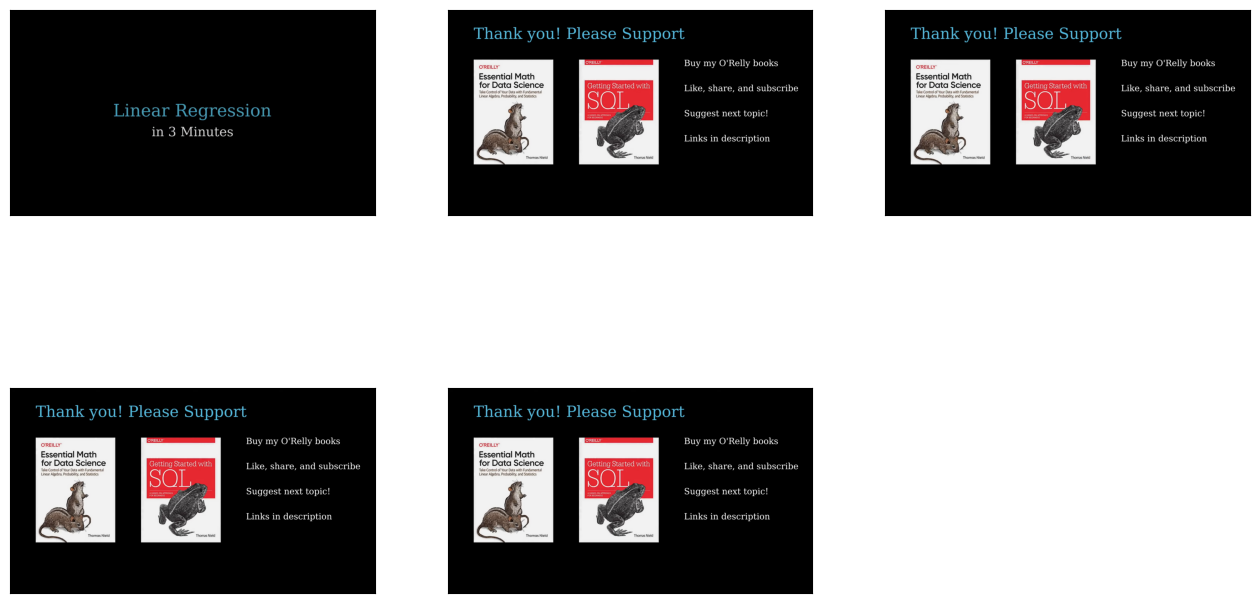

In [47]:
plot_images(img)

In [48]:
qa_tmpl_str=(
    "Based on the provided information, including relevant images and retrieved context from the video, \
    accurately and precisely answer the query without any additional prior knowledge.\n"

    "---------------------\n"
    "Context: {context_str}\n"
    "Metadata for video: {metadata_str} \n"

    "---------------------\n"
    "Query: {query_str}\n"
    "Answer: "
)

In [49]:
import json
metadata_str=json.dumps(metadata_vid)

In [50]:
query_str="can you tell me what is linear regression and equation of linear regression?"

In [51]:
context_str = "".join(text)

In [52]:
image_documents = SimpleDirectoryReader( input_files=img).load_data()

In [62]:
import mimetypes
from llama_index.core.llms import ChatMessage, ImageBlock, MessageRole, TextBlock
from llama_index.multi_modal_llms.gemini import GeminiMultiModal

# 1. Initialize Model
gemini_mm_llm = GeminiMultiModal(
    model="models/gemini-2.5-flash", 
    api_key=GOOGLE_API_KEY,
    max_new_tokens=1500
)

# 2. Construct the Message Blocks Manually
#    We use 'ImageBlock' because that is exactly what the ChatMessage validator wants.
msg_blocks = []

# -- Add the text prompt --
text_content = qa_tmpl_str.format(
    query_str=query_str,
    metadata_str=metadata_str,
    context_str=context_str
)
msg_blocks.append(TextBlock(text=text_content))

# -- Add the images --
for doc in image_documents:
    # Guess mimetype
    mimetype, _ = mimetypes.guess_type(doc.image_path)
    
    # Create the ImageBlock (Pass the path directly)
    # This works better than ImageDocument because it's the native format for chat
    block = ImageBlock(
        path=doc.image_path,
        image_mimetype=mimetype or "image/jpeg"
    )
    msg_blocks.append(block)

# 3. Create the ChatMessage
#    This will now pass validation because we are using ImageBlock, not ImageDocument
msg = ChatMessage(role=MessageRole.USER, blocks=msg_blocks)

# 4. Run Chat (instead of complete)
response = gemini_mm_llm.chat(messages=[msg])

# 5. Print Result
print(response.message.content)

C:\Users\Kartikeya\AppData\Local\Temp\ipykernel_6300\2718694125.py:6: DeprecationWarning: Call to deprecated class GeminiMultiModal. (This package has been deprecated and will no longer be maintained. Please use llama-index-llms-google-genai instead. See Multi Modal LLMs documentation for a complete guide on migration: https://docs.llamaindex.ai/en/stable/understanding/using_llms/using_llms/#multi-modal-llms.) -- Deprecated since version 0.5.1.
  gemini_mm_llm = GeminiMultiModal(


Linear regression is a statistical technique used for modeling the relationship between an output variable and one or more input variables. In simpler terms, it involves fitting a line through data points to make predictions on unknown data, assuming there is a linear relationship between the variables.

The equation of linear regression is commonly expressed as:
**y = mx + b**

Where:
*   **y** is the output variable (also called the dependent variable).
*   **x** is the input variable (also called the independent variable).
*   **m** is the coefficient that controls the slope of the line.
*   **b** is the coefficient that controls the intercept of the line (also known as the bias in machine learning).

In machine learning, the coefficients **m** and **b** are often expressed as **beta 1 (β1)** and **beta 0 (β0)** respectively, leading to the equation:
**y = β1x + β0**
